<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span><ul class="toc-item"><li><span><a href="#Краткий-вывод" data-toc-modified-id="Краткий-вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Краткий вывод</a></span></li></ul></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span><ul class="toc-item"><li><span><a href="#Краткий-вывод" data-toc-modified-id="Краткий-вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Краткий вывод</a></span></li></ul></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span><ul class="toc-item"><li><span><a href="#Краткий-вывод" data-toc-modified-id="Краткий-вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Краткий вывод</a></span></li></ul></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span><ul class="toc-item"><li><span><a href="#Краткий-вывод" data-toc-modified-id="Краткий-вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Краткий вывод</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [85]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [86]:
data = pd.read_csv('/datasets/insurance.csv')

data.head(10)

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
5,1,43.0,41000.0,2,1
6,1,39.0,39700.0,2,0
7,1,25.0,38600.0,4,0
8,1,36.0,49700.0,1,0
9,1,32.0,51700.0,1,0


In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [88]:
data = data.astype('int')

In [90]:
data.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.359400,1.194200,0.148000
std,0.500049,8.440807,9900.082063,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


array([[<AxesSubplot:title={'center':'Пол'}>,
        <AxesSubplot:title={'center':'Возраст'}>],
       [<AxesSubplot:title={'center':'Зарплата'}>,
        <AxesSubplot:title={'center':'Члены семьи'}>],
       [<AxesSubplot:title={'center':'Страховые выплаты'}>,
        <AxesSubplot:>]], dtype=object)

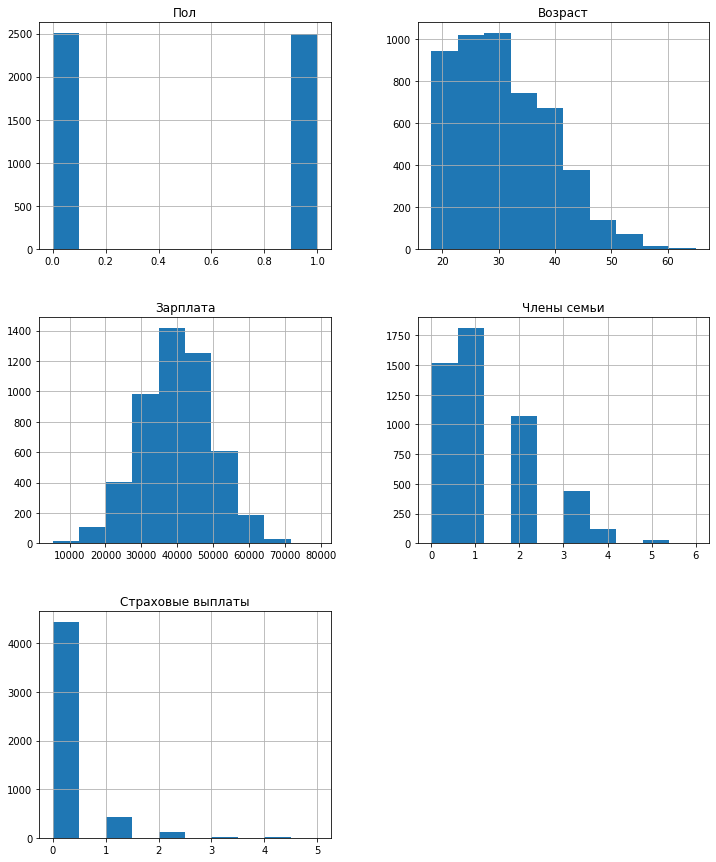

In [91]:
data.hist(figsize=(12,15))

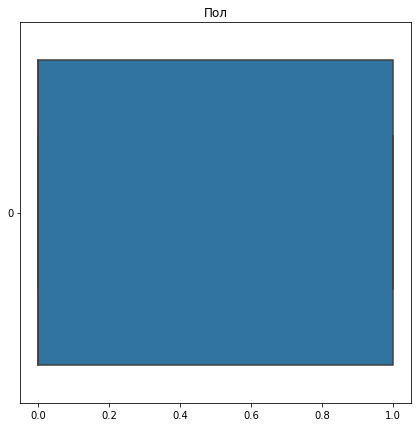

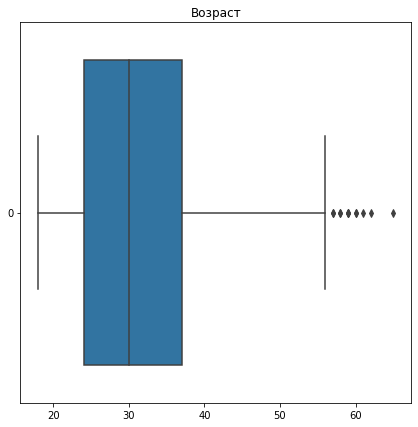

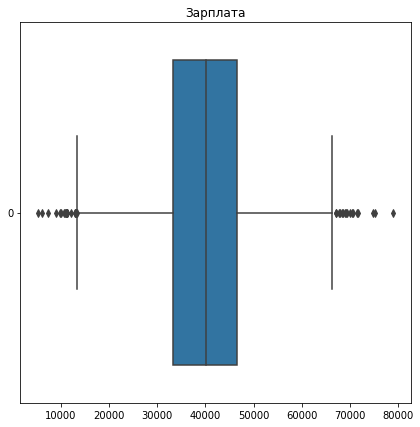

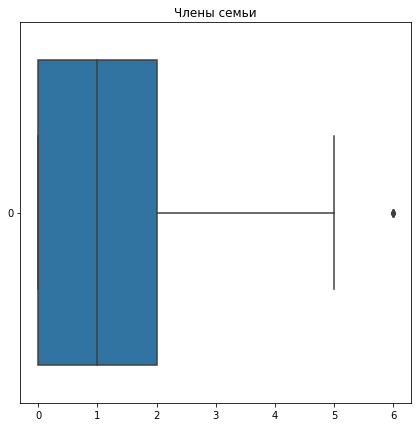

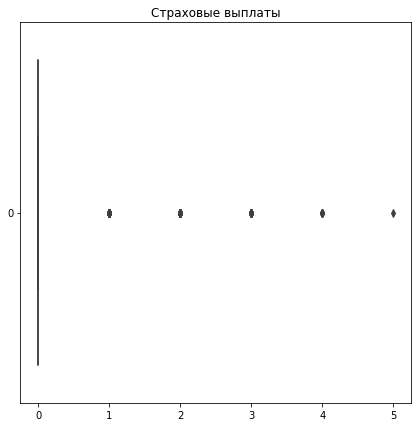

In [92]:
for i in data.columns:
    plt.figure(figsize=[7, 7])
    plt.title(f'{i}')
    sns.boxplot(orient='h', data=data[i])

In [93]:
print('Дубликатов найдено:', data.duplicated().sum())

Дубликатов найдено: 153


In [94]:
data.drop_duplicates(inplace=True)

In [95]:
data = data.reset_index(drop=True)

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4847 entries, 0 to 4846
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Пол                4847 non-null   int64
 1   Возраст            4847 non-null   int64
 2   Зарплата           4847 non-null   int64
 3   Члены семьи        4847 non-null   int64
 4   Страховые выплаты  4847 non-null   int64
dtypes: int64(5)
memory usage: 189.5 KB


### Краткий вывод

Данные просмотрены, критических моментов нет.  
Удалены явные дубликаты, тип данных приведен к адекватному.

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

 Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? 

**Ответ:** не изменится.

**Обоснование:**

Домножим матрицу признаков $X$ на обратимую матрицу $Z$:

$$
X_{д} = XZ
$$

Для новой матрицы $X_{д}$ исходные формулы будут иметь следующий вид:

предсказания:

$$
a_{д} = X_{д}w
$$

Задача обучения:

$$
w_{д} = \arg\min_w MSE(X_{д}w, y)
$$

Формула обучения:

$$
w_{д} = (X_{д}^T X_{д})^{-1} X_{д}^T y
$$

<b>Правильный вариант (надеюсь (: )</b>

Упростим формулу обучения, подставив $X_{д} = XZ$:

$$
w_{д} = ((XZ)^T XZ)^{-1} (XZ)^T y =
$$  
$$
= ((Z^T X^T XZ)^{-1} (XZ)^T y =
$$  
$$
= (X^T XZ)^{-1} (Z^T)^{-1} Z^T X^T y = 
$$
$(a^{-1}a = E$ (свойство обратной матрицы), при умножении на единичную матрицу получаем исходную матрицу)

$$
= (X^T XZ)^{-1} X^T y =
$$
$$
= Z^{-1} (X^T X)^{-1} X^T y
$$

Итого $$
w_{д} = Z^{-1} (X^T X)^{-1} X^T y $$

Так как $w = (X^T X)^{-1} X^T y$, то $w_{д} = Z^{-1}w$

Рассчитаем предсказания. 

$$
a_{д} = X_{д}w_{д} = XZZ^{-1}w = Xw
$$
(опять же по свойству обратной матрицы сокращаем $Z Z^{-1}$).

### Краткий вывод

При умножении признаков на обратимую матрицу предсказания не изменяются.

## Алгоритм преобразования

**Алгоритм**

Проверим теоретический расчет на практике. Качество линейной регрессии не должно измениться.

**Обоснование**

In [100]:
features = data.drop('Страховые выплаты', axis=1)
target = data['Страховые выплаты']

Создадим обратную матрицу размерностью по исходному датафрейму.

In [101]:
z = np.random.randn(features.shape[1], features.shape[1])


In [102]:
try:
    z_inv = np.linalg.inv(z)
except:
    print('Обратной матрицы не существует')

По формулам п. 2 рассчитаем результаты для исходной и домноженной матриц.

In [103]:
w_orig = np.linalg.inv(features.T.dot(features)).dot(features.T).dot(target)
a_orig = features @ w_orig

In [104]:
features_dot = features @ z
w_dot = np.linalg.inv(features_dot.T.dot(features_dot)).dot(features_dot.T).dot(target)
a_dot = features_dot @ w_dot

In [105]:
pd.DataFrame({'a_orig': a_orig, 'a_dot': a_dot, 'a_orig - a_dot': a_orig - a_dot})

,a_orig,a_dot,a_orig - a_dot
0,0.288795,0.288795,-2.425112e-08
1,0.588191,0.588191,-4.113808e-09
2,0.435566,0.435566,1.913292e-09
3,-0.092785,-0.092785,-1.638786e-08
4,0.307588,0.307588,-1.605171e-08
...,...,...,...
4842,0.143509,0.143509,-1.367749e-08
4843,0.134366,0.134366,-9.595272e-09
4844,-0.023962,-0.023962,-1.501676e-08
4845,-0.053629,-0.053629,-3.725867e-08


In [106]:
print('Средняя разница по предсказаниям оригинальной и домноженной матриц:', round(pd.DataFrame({'a_orig': a_orig, 'a_dot': a_dot, 'a_orig - a_dot': a_orig - a_dot})['a_orig - a_dot'].mean() * 100, 10), '%')

Средняя разница по предсказаниям оригинальной и домноженной матриц: -1.7282e-06 %


### Краткий вывод

Разница между предсказаниями — порядка $2 × 10^{-8}$ — незначительна. Можно считать, что предсказания идентичны

## Проверка алгоритма

In [107]:
model = LinearRegression()


In [108]:
model.fit(features, target)

LinearRegression()

In [109]:
score_original = model.score(features, target)
print('Метрика оригинальной модели:', score_original)

Метрика оригинальной модели: 0.4302010046633359


In [110]:
model.fit(features_dot, target)

score_dot = model.score(features_dot, target)
print('Метрика оригинальной модели:', score_dot)

Метрика оригинальной модели: 0.43020100466333355


In [111]:
print('Разница метрик модели', score_original - score_dot)

Разница метрик модели 2.3314683517128287e-15


### Краткий вывод

Алгоритм проверен и соответствует теоретическому решению.

## Вывод

Для защиты данных разработан алгоритм преобразования, не уцхудшающий качества работы модели линейной регрессии.  

Исходные данные проверены, удалены явные дубликаты, тип данных приведен к адекватному.

Теоретически подтвержден алгоритм преобразования данных, далее он же проверен на модели.

Предсказания по оригинальным и модифицированным данным практически идентичны, средняя разница составляет $1.98 × 10^{-08}$ %.

